# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df1=pd.read_csv(r'C:\Users\DELL\Desktop\twitter_training.csv')
df2=pd.read_csv(r'C:\Users\DELL\Desktop\twitter_validation.csv')

In [4]:
df=pd.concat([df1, df2])

In [5]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
994,NaN,NaN,NaN,NaN,4891.0,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,NaN,NaN,NaN,NaN,4359.0,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,NaN,NaN,NaN,NaN,2652.0,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,NaN,NaN,NaN,NaN,8069.0,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,NaN,NaN,NaN,NaN,6960.0,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [10]:
df.describe()

,2401,3364
count,74681.000000,999.000000
mean,6432.640149,6435.159159
std,3740.423819,3728.912226
min,1.000000,6.000000
25%,3195.000000,3241.500000
50%,6422.000000,6560.000000
75%,9601.000000,9662.500000
max,13200.000000,13197.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

In [13]:
df.shape

(75680, 8)

In [14]:
df.isnull().sum()

2401                                                                                                                                                                                                                                                    999
Borderlands                                                                                                                                                                                                                                             999
Positive                                                                                                                                                                                                                                                999
im getting on borderlands and i will murder you all ,                                                                                                                                                                                               

In [16]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [18]:
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)
df.head()

,2401,Borderlands,Positive,text,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [21]:
df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].apply(preprocess_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,I am coming to the borders and I will kill you...,coming border kill
1,im getting on borderlands and i will kill you ...,im getting borderland kill
2,im coming on borderlands and i will murder you...,im coming borderland murder
3,im getting on borderlands 2 and i will murder ...,im getting borderland murder
4,im getting into borderlands and i can murder y...,im getting borderland murder


In [22]:
df.head()

,2401,Borderlands,Positive,text,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",cleaned_text
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,coming border kill
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN,im getting borderland kill
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN,im coming borderland murder
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN,im getting borderland murder
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN,im getting borderland murder


# Sentiment Analysis

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = sia.polarity_scores(text)
    return score
df['sentiment'] = df['cleaned_text'].apply(get_sentiment_score)

df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

df[['cleaned_text', 'compound', 'sentiment_category']].head()


,cleaned_text,compound,sentiment_category
0,coming border kill,-0.6908,negative
1,im getting borderland kill,-0.6908,negative
2,im coming borderland murder,-0.6908,negative
3,im getting borderland murder,-0.6908,negative
4,im getting borderland murder,-0.6908,negative


# Visualization

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


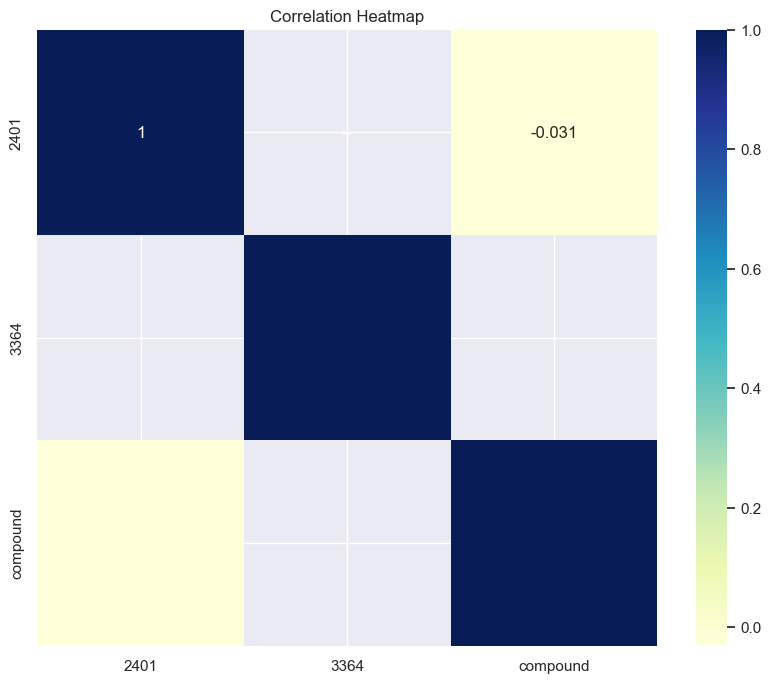

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()

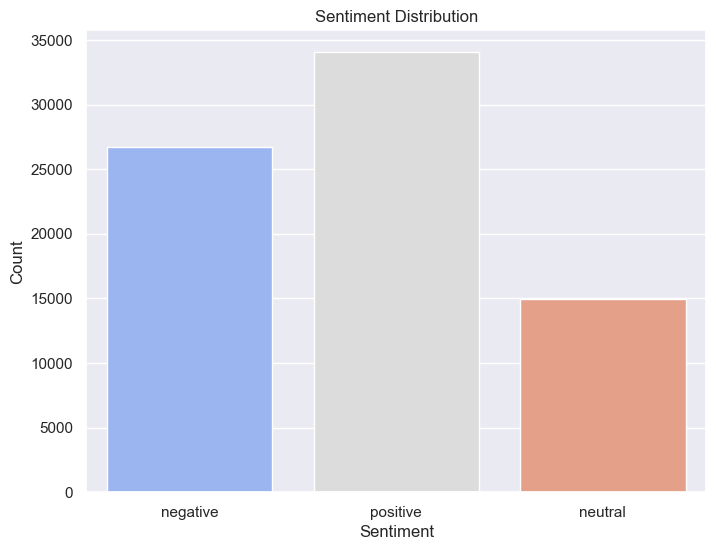

In [26]:
sns.set(style="darkgrid")

plt.figure(figsize=(8,6))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    plt.figure(figsize=(12,6))
    df['sentiment_category'].resample('D').value_counts().unstack().plot(kind='line', colormap='coolwarm')
    plt.title('Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()